In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy as sps
import csv
#import pylab as plt
#import qutip as qt

In [2]:
def Hamiltonian(kx, ky, theta):
    
    theta  = theta/180.0*np.pi 
    b1m    = 8*np.pi*np.sin(theta/2)/3/d*np.array([0.5, -np.sqrt(3)/2])
    b2m    = 8*np.pi*np.sin(theta/2)/3/d*np.array([0.5, np.sqrt(3)/2])
    qb     = 8*np.pi*np.sin(theta/2)/3/np.sqrt(3)/d*np.array([0, -1])
    K1     = 8*np.pi*np.sin(theta/2)/3/np.sqrt(3)/d*np.array([-np.sqrt(3)/2,-0.5])
    K2     = 8*np.pi*np.sin(theta/2)/3/np.sqrt(3)/d*np.array([-np.sqrt(3)/2,0.5])
    H = np.array(np.zeros((4*siteN, 4*siteN)), dtype=complex)
    
    for i in np.arange(siteN):
        #diagonal term
        ix = L[i, 0]
        iy = L[i, 1]
        ax = kx - valley*K1[0] + ix*b1m[0] + iy*b2m[0]
        ay = ky - valley*K1[1] + ix*b1m[1] + iy*b2m[1]

        qx = np.cos(theta/2) * ax + np.sin(theta/2) * ay
        qy =-np.sin(theta/2) * ax + np.cos(theta/2) * ay
         
        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        j = i + siteN
        H[2*j, 2*i]     = TqbD[0, 0]
        H[2*j, 2*i+1]   = TqbD[0, 1]
        H[2*j+1, 2*i]   = TqbD[1, 0]
        H[2*j+1, 2*i+1] = TqbD[1, 1]
        if (iy != valley*N and ix != valley*N):
            j = invL[ix+1+N, iy+valley*1+N] + siteN
            H[2*j, 2*i]     = TqtrD[0, 0]
            H[2*j, 2*i+1]   = TqtrD[0, 1]
            H[2*j+1, 2*i]   = TqtrD[1, 0]
            H[2*j+1, 2*i+1] = TqtrD[1, 1]
        if (ix != valley*N):
            j = invL[ix+valley*1+N, iy+N] + siteN
            H[2*j, 2*i]     = TqtlD[0, 0]
            H[2*j, 2*i+1]   = TqtlD[0, 1]
            H[2*j+1, 2*i]   = TqtlD[1, 0]
            H[2*j+1, 2*i+1] = TqtlD[1, 1]
        

    for i in np.arange(siteN, 2*siteN):
        #diagnoal term
        j = i - siteN
        ix = L[j, 0]
        iy = L[j, 1]
        ax = kx  - valley*K2[0] + ix*b1m[0] + iy*b2m[0] 
        ay = ky  - valley*K2[1] + ix*b1m[1] + iy*b2m[1]

        qx = np.cos(theta/2) * ax - np.sin(theta/2) * ay
        qy = np.sin(theta/2) * ax + np.cos(theta/2) * ay

        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        H[2*j, 2*i]     = Tqb[0, 0]
        H[2*j, 2*i+1]   = Tqb[0, 1]
        H[2*j+1, 2*i]   = Tqb[1, 0]
        H[2*j+1, 2*i+1] = Tqb[1, 1]
        if (iy != (-valley*N) and ix != (-valley*N)):
            j = invL[ix-1+N, iy-valley*1+N]
            H[2*j, 2*i]     = Tqtr[0, 0]
            H[2*j, 2*i+1]   = Tqtr[0, 1]
            H[2*j+1, 2*i]   = Tqtr[1, 0]
            H[2*j+1, 2*i+1] = Tqtr[1, 1]
        if (ix != -valley*N):
            j = invL[ix-valley*1+N, iy+N]
            H[2*j, 2*i]     = Tqtl[0, 0]
            H[2*j, 2*i+1]   = Tqtl[0, 1]
            H[2*j+1, 2*i]   = Tqtl[1, 0]
            H[2*j+1, 2*i+1] = Tqtl[1, 1]


    eigensystem = sps.sparse.linalg.eigsh(H, k = levels, which = "SM")
    
    return eigensystem

In [ ]:
kD = -qb[1]

AtoB = np.arange(-1/2, 1/2, 1/KDens)
BtoC = np.arange(-1, 0, 1/KDens)
CtoD = np.arange(0, sqrt(3), 1/KDens)
DtoA = np.arange(0, 1, 1/KDens)

AllK  = len(AtoB) + len(BtoC) + len(CtoD) + len(DtoA)
E  = np.zeros((AllK,4*siteN), float)


for i in range(0, len(AtoB)):
    k = AtoB[i]
    E[i] = np.real(Hamiltonian(sqrt(3)/2*kD, k*kD))
for i in range(len(AtoB), len(AtoB)+len(BtoC)):
    k = BtoC[i-len(AtoB)]
    E[i] = np.real(Hamiltonian(0, k*kD))
for i in range(len(AtoB)+len(BtoC), len(AtoB)+len(BtoC)+len(CtoD)):
    k = CtoD[i-len(AtoB)-len(BtoC)]
    E[i] = np.real(Hamiltonian(1.0/2*k*kD, -k*sqrt(3)/2*kD))
for i in range(len(AtoB)+len(BtoC)+len(CtoD), AllK):
    k = DtoA[i-len(AtoB)-len(BtoC)-len(CtoD)]
    E[i] = np.real(Hamiltonian(-sqrt(3)/2*k*kD, -1/2*k*kD))


%matplotlib qt

for j in range(0,4*siteN):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-2000,2000)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
-3.612099949722249459e-01 3.612099949722249459e-01

In [41]:
vals = np.array([-0.1, 0.1])
omega = 0.2
e_win = 0.005
result = np.where(vals>0, 0, vals)
occup = np.where(result<0, 1 ,result)

In [42]:
occup

array([1., 0.])

In [69]:
omega_minus = max(omega-e_win, 1.e-6)
omega_plus = omega + e_win
inds_ef = np.intersect1d(np.where(occup>0)[0], np.where(occup<1)[0])
if len(inds_ef):
    ind_vbm = max(inds_ef)
    ind_cbm = min(inds_ef)
else:
    ind_vbm = max(np.where(occup==1)[0])
    ind_cbm = min(np.where(occup==0)[0])
vbm = vals[ind_vbm]
cbm = vals[ind_cbm]
    
e_bott = cbm - omega - e_win
e_top = vbm + omega + e_win
inds_shot = np.intersect1d(np.where(vals>=e_bott), np.where(vals<=e_top))

inds_vb = np.arange(ind_vbm, inds_shot[0]-1, -1)
inds_cb = np.arange(ind_cbm, inds_shot[-1]+1)


In [71]:
occup

array([1., 0.])

In [44]:
inds_ef

array([], dtype=int64)

In [70]:
ind_vbm

0

In [46]:
ind_cbm

1

In [47]:
e_bott

-0.10500000000000001

In [48]:
e_top

0.10500000000000001

In [49]:
np.intersect1d(np.where(vals>=e_bott), np.where(vals<=e_top))

array([0, 1])

In [50]:
np.where(vals>=e_bott)

(array([0, 1]),)

In [51]:
np.where(vals<=e_top)

(array([0, 1]),)

In [66]:
inds_shot = np.intersect1d(np.where(vals>=e_bott), np.where(vals<=e_top))

In [67]:
inds_shot

array([0, 1])

In [68]:
def add_pair(ind_vb):
    e0 = vals[ind_vb]
    des = vals - e0
    inds_chosen = np.intersect1d(np.where(des>=omega_minus)[0], np.where(des<=omega_plus)[0])
    inds_chosen = np.intersect1d(inds_chosen, inds_cb)
    pairs_chosen = [[ind_vb, indi] for indi in inds_chosen]
    return pairs_chosen
pairs = [add_pair(ind_vb) for ind_vb in inds_vb]
pairs = [i for i in pairs if len(i)]

In [55]:
pairs

[[[0, 1]]]

In [56]:
inds_vb

array([0])

In [32]:
e0

NameError: name 'e0' is not defined

In [57]:
ind_vb = 0
e0 = vals[ind_vb]
des = vals - e0
inds_chosen = np.intersect1d(np.where(des>=omega_minus)[0], np.where(des<=omega_plus)[0])
inds_chosen = np.intersect1d(inds_chosen, inds_cb)
pairs_chosen = [[ind_vb, indi] for indi in inds_chosen]

In [58]:
e0

-0.1

In [59]:
des

array([0. , 0.2])

In [60]:
inds_chosen

array([1])

In [61]:
np.intersect1d(np.where(des>=omega_minus)[0], np.where(des<=omega_plus)[0])

array([1])

In [62]:
omega_minus

0.195

In [63]:
omega_plus

0.20500000000000002

In [65]:
pairs_chosen

[[0, 1]]

In [76]:
def pick_up_transition_pairs(vals, omega, e_win, occup):
    omega_minus = max(omega-e_win, 1.e-6)
    omega_plus = omega + e_win
    inds_ef = np.intersect1d(np.where(occup>0)[0], np.where(occup<1)[0])
    if len(inds_ef):
        ind_vbm = max(inds_ef)
        ind_cbm = min(inds_ef)
    else:
        ind_vbm = max(np.where(occup==1)[0])
        ind_cbm = min(np.where(occup==0)[0])
    vbm = vals[ind_vbm]
    cbm = vals[ind_cbm]
    
    e_bott = cbm - omega - e_win
    e_top = vbm + omega + e_win
    inds_shot = np.intersect1d(np.where(vals>=e_bott), np.where(vals<=e_top))

    if len(inds_shot):
        inds_vb = np.arange(ind_vbm, inds_shot[0]-1, -1)
        inds_cb = np.arange(ind_cbm, inds_shot[-1]+1)
    else:
        inds_vb = []
        inds_cb = []

    def add_pair(ind_vb):
        e0 = vals[ind_vb]
        des = vals - e0
        inds_chosen = np.intersect1d(np.where(des>=omega_minus)[0], np.where(des<=omega_plus)[0])
        inds_chosen = np.intersect1d(inds_chosen, inds_cb)
        pairs_chosen = [[ind_vb, indi] for indi in inds_chosen]
        return pairs_chosen
    pairs = [add_pair(ind_vb) for ind_vb in inds_vb]
#    pairs = [add_pair(ind_vbm)]
    pairs = [i for i in pairs if len(i)]
    if len(pairs):
        return np.concatenate(pairs)
    else:
        return []
    
def occup_0K(vals, spin=1):
    """
    for graphene system, one pz orbital contribute one electron
    """
    result = np.where(vals>0, 0, vals)
    result2 = np.where(result<0, 1 ,result)

    return result2

In [73]:
vals = [[-3.612099949722249459e-01, 3.612099949722249459e-01],
[-3.522954985094583491e-01, 3.522954985094583491e-01],
[-3.436244428491525005e-01, 3.436244428491525005e-01],
[-3.352157198401093385e-01, 3.352157198401093385e-01],
[-3.270895620218176592e-01, 3.270895620218176592e-01],
[-3.192675460965237466e-01, 3.192675460965237466e-01],
[-3.117725646180832255e-01, 3.117725646180832255e-01],
[-3.046287572730904669e-01, 3.046287572730904669e-01]]

In [74]:
vals[0]

[-0.36120999497222495, 0.36120999497222495]

In [89]:
omega = 0.75
e_win = 0.1
occup = occup_0K(np.array(vals[0]))
pick_up_transition_pairs(np.array(vals[0]), omega, e_win, occup)

array([[0, 1]])

In [92]:
max(np.where(occup==1)[0])

0

In [93]:
inds_vb

array([0])

In [94]:
array = np.array([0.0,0.0])

In [95]:
array==0

array([ True,  True])

In [99]:
if array[0]==0:
    print('go')

go


In [101]:
np.where(array==0, 0.5, array)

array([0.5, 0.5])

In [104]:
8//3

2

In [105]:
8%3

2

In [108]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y, indexing='ij')
for i in range(nx):
    for j in range(ny):
        print(i)

0
0
1
1
2
2


In [121]:
a = np.array([[1,2],[3,2]])
b = np.identity(10)

c = np.empty((a.shape[0], a.shape[1] * b.shape[1]))
for i in range(c.shape[0]):
    c[i,:] = np.kron(a[i], b[i])

In [110]:
c

array([[1., 1., 2., 2.],
       [3., 3., 2., 2.]])

In [111]:
c = np.add.outer(a,b)

In [112]:
c

array([[[[2, 2],
         [2, 2]],

        [[3, 3],
         [3, 3]]],


       [[[4, 4],
         [4, 4]],

        [[3, 3],
         [3, 3]]]])

In [122]:
na = a.shape[0]
nb = b.shape[0]
result = np.einsum('ij,kl->ikjl',b,a).reshape(-1, na * nb)

In [123]:
result

array([[1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [3., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 3., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [124]:
import numpy as np
from scipy.linalg import block_diag

A = np.array([[1, 2], 
              [3, 4]])    
B = np.array([[5, 6], 
              [7, 8]])
block_diag(A,B)


array([[1, 2, 0, 0],
       [3, 4, 0, 0],
       [0, 0, 5, 6],
       [0, 0, 7, 8]])

In [125]:
block_diag(A,B,A)

array([[1, 2, 0, 0, 0, 0],
       [3, 4, 0, 0, 0, 0],
       [0, 0, 5, 6, 0, 0],
       [0, 0, 7, 8, 0, 0],
       [0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 3, 4]])

In [126]:
list = [A,B,A]
block_diag(*list)

array([[1, 2, 0, 0, 0, 0],
       [3, 4, 0, 0, 0, 0],
       [0, 0, 5, 6, 0, 0],
       [0, 0, 7, 8, 0, 0],
       [0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 3, 4]])

In [1]:
import numpy as np
from scipy.linalg import block_diag

t = 2.7 # eV hopping between monolayer neighbours
t_layers = 0.4 # eV hopping between A and B atoms in AB bilayer
hbarv = 0.5*np.sqrt(3)*2.46*t
a0 = 1.42 # angstrom-1

def NearNeighbSum(kx,ky):
	return 2*np.exp(0.5*1.j*kx*a0)*np.cos(0.5*ky*a0*np.sqrt(3))+np.exp(-1.j*kx*a0)

a = 2.46 # angstrom
k = 2*np.pi/a # inverse angstrom
kstep0 = 0.001
kstep = kstep0*k 
N = 10 

Kx = 0
Ky = -2/3*k # Dirac point coordinates
blocks = []

def Hamiltonian(N, kx, ky):

	S = NearNeighbSum(kx,ky)
	block1 = np.zeros((2,2), dtype='complex')
	block1[0][0] = block1[1][1] = 0
	block1[1][0] = t*np.conj(S)
	block1[0][1] = t*S
	block2 = np.conj(block1)
	ham = block_diag(block1, block2)
	"""
	sigma_x = np.matrix([[0,1],[1,0]])
	off_diag = np.matrix([[t_layers,0],[0,0]])
	ham += np.kron(sigma_x, off_diag)
	"""
	return ham



"""
eigenenergies = []
eigenfunctions = []
"""

for i in np.arange(-N,N+1): # -N ... 0 ... N
	for j in np.arange(-N,N+1):
		ham_mono = Hamiltonian(N, Kx+i*kstep, Ky+j*kstep)
		blocks.append(ham_mono)
"""
		eigenvalues, eigenvectors = np.linalg.eigh(ham_mono)
		eigenenergies.append(eigenvalues)
		eigenfunctions.extend(eigenvectors)
"""

"""
real_eigenenergies = np.real(eigenenergies)
"""

hamiltonian = block_diag(*blocks)

In [2]:
hamiltonian.shape

(1764, 1764)

In [3]:
hamiltonian[0][0]

0j

In [4]:
hamiltonian[0].shape

(1764,)

In [5]:
hamiltonian[0]

array([ 0.        +0.j        , -0.14493431+0.14946889j,
        0.        +0.j        , ...,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ])

In [6]:
np.count_nonzero(hamiltonian)

1764

In [7]:
import time

start = time.time()
eigenenergies, eigenfunctions = np.linalg.eigh(hamiltonian)
real_eigenenergies = np.real(eigenenergies)
end = time.time()
print(end - start)

0.5410060882568359


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(arr)
plt.show()

In [8]:
x = np.linspace(-10, 10, 491)
y = np.linspace(-10, 10, 491)
x, y = np.meshgrid(x, y)
x_0 = -3
y_0 = -6
mask = np.sqrt((x-x_0)**2+(y-y_0)**2)

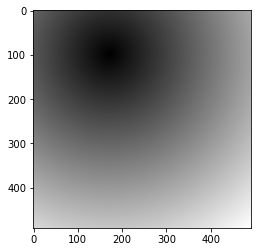

In [11]:
import matplotlib.pyplot as plt
maskimg = plt.imshow(mask,cmap="gray")
plt.show()

In [26]:
import numpy as np
from skimage.draw import disk
shape = (100, 100)
img = np.zeros(shape, dtype=np.uint8)
rr, cc = disk((5, 5), 5, shape=shape)
img[rr, cc] = 1

In [27]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
sum = 0
for x,y in img:
    sum+=1

ValueError: too many values to unpack (expected 2)

In [31]:
sum

2

In [33]:
def occup_0K(vals, spin=1):
    """
    for graphene system, one pz orbital contribute one electron
    """
    if vals[0]==0:
        result = np.where(vals==0, 1, vals)
        return result
    else:
        result1 = np.where(vals>0, 0, vals)
        result2 = np.where(result1<0, 2 ,result1)
        return result2

In [36]:

energies = np.array([-5,2,2,1])
occup = occup_0K(energies)

In [37]:
occup

array([2, 0, 0, 0])

In [38]:
def pick_up_transition_pairs(vals, omega, e_win, occup):
    omega_minus = max(omega-e_win, 1.e-6)
    omega_plus = omega + e_win
    inds_ef = np.intersect1d(np.where(occup>0)[0], np.where(occup<2)[0])
    if len(inds_ef):
        ind_vbm = max(inds_ef)
        ind_cbm = min(inds_ef)
    else:
        ind_vbm = max(np.where(occup==2)[0])
        ind_cbm = min(np.where(occup==0)[0])
    vbm = vals[ind_vbm]
    cbm = vals[ind_cbm]
    e_bott = cbm - omega - e_win
    e_top = vbm + omega + e_win
    inds_shot = np.intersect1d(np.where(vals>=e_bott), np.where(vals<=e_top))
    if len(inds_shot):
        inds_vb = np.arange(ind_vbm, inds_shot[0]-1, -1)
        inds_cb = np.arange(ind_cbm, inds_shot[-1]+1)
    else:
        inds_vb = []
        inds_cb = []
    def add_pair(ind_vb):
        e0 = vals[ind_vb]
        des = vals - e0
        inds_chosen = np.intersect1d(np.where(des>=omega_minus)[0], np.where(des<=omega_plus)[0])
        inds_chosen = np.intersect1d(inds_chosen, inds_cb)
        pairs_chosen = [[ind_vb, indi] for indi in inds_chosen]
        return pairs_chosen
    pairs = [add_pair(ind_vb) for ind_vb in inds_vb]
    pairs = [i for i in pairs if len(i)]
    if len(pairs):
        return np.concatenate(pairs)
    else:
        return []

In [52]:

energies = np.array([-5-2,2,1])
occup = occup_0K(energies)
e_win = 0.3
for omega in np.arange(8,15,0.1):
    print(pick_up_transition_pairs(energies, omega, e_win, occup))

[]
[]
[]
[]
[]
[]
[]
[]
[[0 1]]
[[0 1]]
[[0 1]]
[[0 1]]
[[0 1]]
[[0 1]]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [47]:
np.arange(0,3,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

In [55]:
for i in [0,1]:
    for j in [2,3]:
        print([i,j])

[0, 2]
[0, 3]
[1, 2]
[1, 3]


In [88]:
def pick_up_transition_pairs(vals, omega, e_win, occup):
    pairs = []
    for i in [0,1]:
        for j in [2,3]:
            if np.abs(vals[j]-vals[i]-omega)<e_win:
                pairs.append([i,j])
    return pairs

In [89]:

energies = np.array([-5,-2,2,1])
occup = occup_0K(energies)
e_win = 0.3
for omega in np.arange(4,5.5,0.1):
    print(pick_up_transition_pairs(energies, omega, e_win, occup))

[[1, 2]]
[[1, 2]]
[[1, 2]]
[[1, 2]]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [77]:
energies[0]

-5

In [78]:
energies[2]

2